<a href="https://colab.research.google.com/github/UEC-MaTa/News_Aggregator/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 映画レビューのテキスト分類

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/text_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a> </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab で実行</a> </td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub でソースを表示</a> </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/keras/text_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a> </td>
</table>

このチュートリアルでは、ディスクに保存されているプレーンテキストファイルを使用してテキストを分類する方法について説明します。IMDB データセットでセンチメント分析を実行するように、二項分類器をトレーニングします。ノートブックの最後には、Stack Overflow のプログラミングに関する質問のタグを予測するためのマルチクラス分類器をトレーニングする演習があります。


In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses


In [ ]:
print(tf.__version__)

2.12.0


## センチメント分析

このノートブックでは、映画レビューのテキストを使用して、それが*肯定的*であるか*否定的*であるかに分類するようにセンチメント分析モデルをトレーニングします。これは*二項*分類の例で、機械学習問題では重要な分類法として広く適用されます。

ここでは、[Internet Movie Database](https://ai.stanford.edu/~amaas/data/sentiment/) から抽出した 50,000 件の映画レビューを含む、[大規模なレビューデータセット](https://www.imdb.com/)を使います。レビューはトレーニング用とテスト用に 25,000 件ずつに分割されています。トレーニング用とテスト用のデータは<strong>均衡</strong>しています。言い換えると、それぞれが同数の肯定的及び否定的なレビューを含んでいます。


★それぞれデータを抜粋＆Google翻訳を追記してみた★

**★train\unsup\0_0.txt★**  
I admit, the great majority of films released before say 1933 are just not for me. Of the dozen or so "major" silents I have viewed, one I loved (The Crowd), and two were very good (The Last Command and City Lights, that latter Chaplin circa 1931).<br /><br />So I was apprehensive about this one, and humor is often difficult to appreciate (uh, enjoy) decades later. I did like the lead actors, but thought little of the film.<br /><br />One intriguing sequence. Early on, the guys are supposed to get "de-loused" and for about three minutes, fully dressed, do some schtick. In the background, perhaps three dozen men pass by, all naked, white and black (WWI ?), and for most, their butts, part or full backside, are shown. Was this an early variation of beefcake courtesy of Howard Hughes?

正直に言うと、1933 年以前に公開された映画の大部分は私には向いていません。 私が鑑賞した十数本の「主要な」サイレント映画のうち、1 つは私が大好きで (『群衆』)、2 つは非常に良かった (『最後の命令』と『街の灯』、後者のチャップリンは 1931 年頃)。

だから私はこれについては不安を感じていました、そしてユーモアは何十年も経つと理解する（ええと、楽しむ）のが難しいことがよくあります。 私は主演俳優は好きでしたが、映画についてはほとんど考えていませんでした。

興味深いシーケンスが 1 つあります。 早い段階で、男性たちは「シラミ駆除」をし、服を着て約 3 分間、ちょっとした冗談をすることになっています。 背景では、おそらく 30 人ほどの男が通り過ぎますが、全員裸、白人、黒人 (第一次世界大戦 ?)、ほとんどの場合、彼らのお尻、裏側の一部または全体が映っています。 これはハワード ヒューズの好意によるビーフケーキの初期のバリエーションでしたか?

**★train\pos\0_9.txt★**  
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!

『ブロムウェル高校』はコメディ漫画です。 「ティーチャーズ」など、学校生活に関する他の番組と同時に放送されました。 教職に就いて35年になる私は、ブロムウェル高校の風刺は「ティーチャーズ」よりもはるかに現実に近いと信じるようになった。 経済的に生き残るための競争、哀れな教師の尊大さを見抜く洞察力に優れた生徒たち、状況全体の取るに足らないことはすべて、私が知っていた学校とその生徒たちを思い出させます。 ある生徒が何度も学校に放火しようとしたエピソードを見たとき、私はすぐに……高校時代の……を思い出しました。 古典的なセリフ: 警部: 私はあなたの教師の一人を解雇するためにここに来ました。 生徒: ブロムウェル高校へようこそ。 私と同世代の多くの大人は、ブロムウェル高校のことはとんでもないと思っていると思います。 そうじゃないのはなんと残念なことでしょう！

**★train\neg\0_3.txt★**  
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.

豚に対して異常な感情を抱く男の物語。 不条理コメディの素晴らしい例であるオープニングシーンから始まります。 正規のオーケストラの聴衆は、歌手たちの狂気の合唱によって狂気の暴力的な暴徒と化す。 残念なことに、それはずっと不条理なままで、一般的な物語がなく、最終的にはあまりにも不快なものになります。 時代のものであってもオフにする必要があります。 不可解な会話は、シェイクスピアを小学 3 年生にとって簡単に思わせるでしょう。 技術的なレベルでは、将来の偉大なヴィルモス・ジグモンドによる優れた撮影技術により、思ったよりも優れています。 将来のスター、サリー・カークランドとフレデリック・フォレストが簡単に見られます。

**★test\pos\0_10.txt★**  
I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.

昨夜、数人の友人に誘われてこの映画を観に行きました。 正直に言うと、アシュトン・カッチャーについて私が知っていた限りでは、彼はコメディしかできなかったので、観るのに気が進まなかった。 私は間違っていた。 カッチャーはジェイク・フィッシャーをとても上手に演じ、ケビン・コスナーはベン・ランドールをプロ意識を持って演じました。 良い映画の兆候は、それが私たちの感情をもてあそぶことができることです。 これはまさにそれをやりました。 劇場全体（満員）は、映画の前半は笑いに包まれ、後半は感動の涙があふれていました。 劇場を出るとき、私は多くの女性が泣いているのを見ただけでなく、多くの成人男性も涙を流しているところを誰にも見られないよう必死に努力していました。 この映画は素晴らしかったので、判断する前に観に行くことをお勧めします。

**★test\neg\0_2.txt★**  
Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.

またもコスナー氏は必要以上に映画を長引かせてしまった。 素晴らしい海難救助のシーンは別として、それはほとんどありませんが、登場人物の誰にも興味がありませんでした。 私たちのほとんどはクローゼットの中に幽霊を抱えており、コスナーのキャラクターは早い段階で認識され、その後ずっと忘れられるまで忘れられていましたが、その頃には私は気にしていませんでした。 私たちが本当に注意すべきキャラクターは、非常に生意気で自信過剰なアシュトン・カッチャーです。 問題は、彼が自分が周りの誰よりも優れていると思い込んでおり、クローゼットが散らかっている気配をまったく見せない子供のように思われていることです。 彼の唯一の障害はコスナーに勝つことのようだ。 最後に、この悪臭の中間点をかなり過ぎたとき、コスナーはカッチャーの幽霊についてすべてを話します。 私たちは、事前の予兆や予兆もなく、なぜカッチャーが最高になろうとするのかを語られます。 ここには魔法はありません。1時間経っても電源を切らないようにするのが精一杯でした。

### IMDB データセットをダウンロードして調べる

データセットをダウンロードして抽出してから、ディレクトリ構造を調べてみましょう。

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 2s 0us/step


In [ ]:
os.listdir(dataset_dir)

['train', 'imdb.vocab', 'imdbEr.txt', 'README', 'test']

★acllmdbフォルダーのファイル構造を確認してみた★

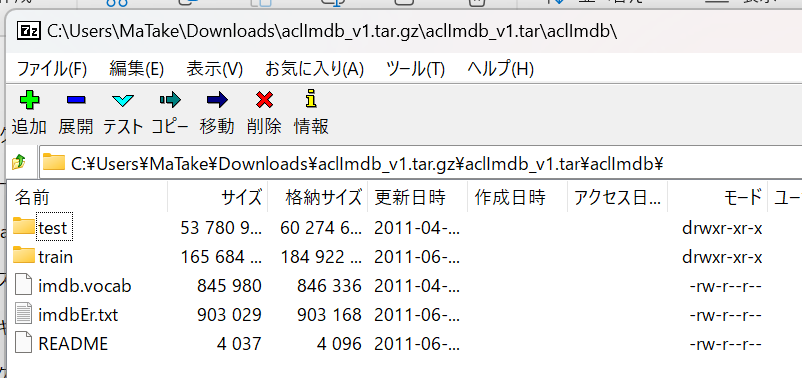

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_pos.txt',
 'pos',
 'neg',
 'urls_unsup.txt',
 'unsupBow.feat',
 'labeledBow.feat',
 'unsup',
 'urls_neg.txt']

★trainフォルダーのファイル構造を確認してみた★

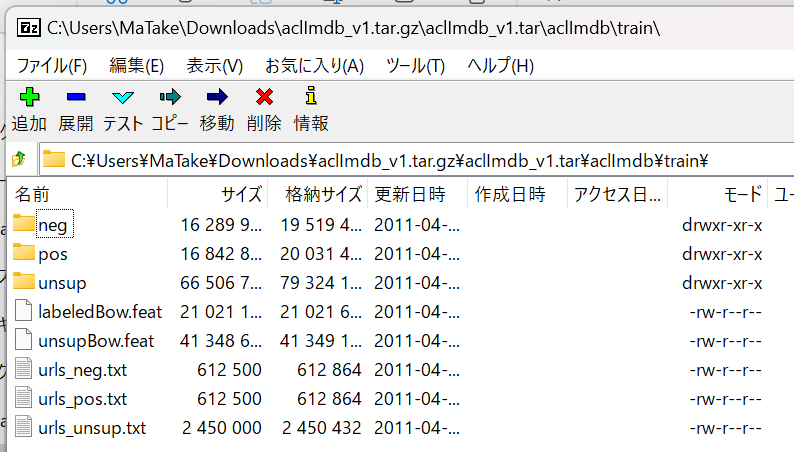

`aclImdb/train/pos` および `aclImdb/train/neg` ディレクトリには多くのテキストファイルが含まれており、それぞれが 1 つの映画レビューです。それらの 1 つを見てみましょう。

In [ ]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


★Google翻訳を追記してみた★

レイチェル グリフィスは、この受賞歴のある短編映画を脚本および監督しています。 悲しみに対処し、愛する人や失った人たちの思い出を大切にする心温まる物語。 わずか 15 分ですが、グリフィスは短い時間の中で非常に多くの感情と真実をフィルムに収めることに成功しました。 バド・ティングウェルは、妻の死に対処しようと奮闘する未亡人ウィルを感動的に演じている。 ウィルはルースのペットの牛チューリップの世話をしていくうちに、孤独と無力感という厳しい現実に直面する。 この映画は、愛する人や失った人たちに対して感じる悲しみと責任を描いています。 優れた撮影、優れた演出、素晴らしい演技。 愛する人を失い、生き残ったすべての人に涙をもたらすでしょう。

### データセットを読み込む

次に、データをディスクから読み込み、トレーニングに適した形式に準備します。これを行うには、便利な [text_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text_dataset_from_directory) ユーティリティを使用します。このユーティリティは、次のようなディレクトリ構造を想定しています。

```
main_directory/
...class_a/
......a_text_1.txt
......a_text_2.txt
...class_b/
......b_text_1.txt
......b_text_2.txt
```

二項分類用のデータセットを準備するには、ディスクに `class_a` および `class_b`に対応する 2 つのフォルダが必要です。これらは、`aclImdb/train/pos` および `aclImdb/train/neg` にある肯定的および否定的な映画レビューになります。IMDB データセットには追加のフォルダーが含まれているため、このユーティリティを使用する前にそれらを削除します。

In [ ]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

次に、`text_dataset_from_directory` ユーティリティを使用して、ラベル付きの `tf.data.Dataset` を作成します。[tf.data](https://www.tensorflow.org/guide/data) は、データを操作するための強力なツールのコレクションです。

機械学習実験を実行するときは、データセットを[トレーニング](https://developers.google.com/machine-learning/glossary#training_set)、[検証](https://developers.google.com/machine-learning/glossary#validation_set)、および、[テスト](https://developers.google.com/machine-learning/glossary#test-set)の 3 つに分割することをお勧めします。

IMDB データセットはすでにトレーニング用とテスト用に分割されていますが、検証セットはありません。以下の `validation_split` 引数を使用して、トレーニングデータの 80:20 分割を使用して検証セットを作成しましょう。

In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


**★★　篠崎先生に、質問　★★**  
★raw_train_dsの中身を確認しようとしてみた★

In [ ]:
print(raw_train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


**★★　篠崎先生に、質問　★★**  
★tf.keras.utils.text_dataset_from_directoryの使い方が分からない。★  
念のため。以下を調べてみたが、よく理解ができず。  
https://enginfo.jp/ta13-%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88%E5%88%86%E9%A1%9E-%E6%A4%9C%E8%A8%8E/  
以下は抜粋。  
"tf.keras.preprocessing.text_dataset_from_directory"は、TensorFlowのKerasライブラリに含まれる関数で、テキストデータを読み込んでDatasetオブジェクトに変換するために使用されます。この関数は、サブディレクトリがテキストデータのカテゴリ/クラスに対応するように保存されたテキストファイルを読み込むためのものです。この関数は、トレーニングに使用できるDatasetオブジェクトを返します。

この関数は、データの読み込みと処理の方法を制御するための様々なパラメータを使用することができます。これらのパラメータには次のようなものがあります：

directory: テキストファイルが保存されているディレクトリへのパス。

labels: 各テキストファイルに関連付けられたラベル（サブディレクトリ名からラベルへのマッピングを含む辞書）。

batch_size: Dataset内の各バッチに含まれるサンプル数。

shuffle: エポックごとにデータをシャッフルするかどうか。

text_encoding: テキストファイルに使用されるエンコーディング。

全体的に、"tf.keras.preprocessing.text_dataset_from_directory"は、テキストデータの読み込みと前処理を容易にする便利な関数であり、テキストベースの機械学習モデルのトレーニングのプロセスを簡素化することができます。

★篠崎先生アドバイスを基に追記  
text_dataset_from_directoryについての解説など  
https://docs.google.com/document/u/0/?authuser=0&usp=docs_web

★以前に紹介いただいた以下を参考にして、  
dir, vars, inspect.getmembers  
raw_train_dsについて確認しようとしてみた★  
https://srbrnote.work/archives/4946#toc9  

In [ ]:
"""
#★raw_train_dsについて確認しようとしてみた★
print(raw_train_ds)
"""

'\n#★raw_train_dsについて確認しようとしてみた★\nprint(raw_train_ds)\n'

In [ ]:
"""
#★dir関数を使って、raw_train_dsについて確認しようとしてみた★
dir(raw_train_ds)
"""

'\n#★dir関数を使って、raw_train_dsについて確認しようとしてみた★\ndir(raw_train_ds)\n'

In [ ]:
"""
#★vars関数を使って、raw_train_dsについて確認しようとしてみた★
vars(raw_train_ds)
"""

'\n#★vars関数を使って、raw_train_dsについて確認しようとしてみた★\nvars(raw_train_ds)\n'

In [ ]:
"""
#★inspect.getmembers関数を使って、raw_train_dsについて確認しようとしてみた★
import inspect
inspect.getmembers(raw_train_ds)
"""

'\n#★inspect.getmembers関数を使って、raw_train_dsについて確認しようとしてみた★\nimport inspect\ninspect.getmembers(raw_train_ds)\n'

**★★　篠崎先生に、質問　★★**  
★上の内容では分からないので、この後のコードを参考にして、raw_train_ds.take(1)の確認しようとしてみた★
for text_batch, label_batch in ***raw_train_ds.take(1)***:  
  for i in range(3):  
    print("Review", text_batch.numpy()[i])  
    print("Label", label_batch.numpy()[i])  

In [ ]:
print(raw_train_ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


**★★　篠崎先生に、質問　★★**  
★上の内容でも分からない。以下のコードのtext_batchやlabel_batchに相当するようなものを確認できないか？★

for **text_batch, label_batch** in raw_train_ds.take(1):  
  for i in range(3):  
    print("Review", ***text_batch***.numpy()[i])  
    print("Label", ***label_batch***.numpy()[i])  

★もしくは、以下のコードのraw_train_ds.class_names[0]や[1]に相当するようなものを確認できないか？★

print("Label 0 corresponds to", ***raw_train_ds.class_names[0]***)  
print("Label 1 corresponds to", ***raw_train_ds.class_names[1]***)

★篠崎先生アドバイス
https://docs.google.com/document/d/1oWvKcVANWmEdqPqrUsyCzjZzcSRODiv-AHMUP8gEWdo/edit#

as_numpy_iterator()使用も


In [ ]:
print(list(raw_train_ds.take(1).as_numpy_iterator())) #★

[(array([b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)',
       b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into compl

上記のように、トレーニングフォルダには 25,000 の例があり、そのうち 80％ (20,000) をトレーニングに使用します。以下に示すとおり、データセットを `model.fit` に直接渡すことで、モデルをトレーニングできます。`tf.data` を初めて使用する場合は、データセットを繰り返し処理して、次のようにいくつかの例を出力することもできます。

In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b"Having seen most of Ringo Lam's films, I can say that this is his best film to date, and the most unusual. It's a ancient china period piece cranked full of kick-ass martial arts, where the location of an underground lair full of traps and dungeons plays as big a part as any of the characters. The action is fantastic, the story is tense and entertaining, and the set design is truely memorable. Sadly, Burning Paradise has not been made available on DVD and vhs is next-to-impossible to get your mitts on, even if you near the second biggest china-town in North America (like I do). If you can find it, don't pass it up."
Label 1
Review b'Caution: May contain spoilers...<br /><br />I\'ve seen this movie 3 times & I\'ve liked it every time. Upon seeing it again, I\'m always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would\'ve gotten Oscars for it\'s performances had it been released for general distribution instead of made for TV.<

レビューには生のテキストが含まれていることに注意してください（句読点や `<br/>` などのような HTML タグが付いていることもあります）。次のセクションでは、これらの処理方法を示します。

ラベルは 0 または 1 です。これらのどれが肯定的および否定的な映画レビューに対応するかを確認するには、データセットの `class_names` プロパティを確認できます。


In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


次に、検証およびテスト用データセットを作成します。トレーニング用セットの残りの 5,000 件のレビューを検証に使用します。

注意:  `validation_split` および `subset` 引数を使用する場合は、必ずランダムシードを指定するか、`shuffle=False` を渡して、検証とトレーニング分割に重複がないようにします。

In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [ ]:
# ★
for text_batch, label_batch in raw_val_ds.take(1):
  for i in range(5):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b"A very well made film set in early '60s communist Yugoslavia. The five young actors who are the teenagers at the center of the story give strong, sincere and emotionally deep performances. A clear depiction of how the natural trust and naivete inherent in teens can be easily manipulated and how that impacted the rest of their lives. Highly recommended."
Label 1
Review b'The barbarians maybe\xc2\xb4s not the best film that anybody of us have seen, but really????........It\xc2\xb4s so funny......I can\xc2\xb4t discribe how mutch I laughed when I first saw it..The director really wanted to do a serious adventure movie, but it\xc2\xb4sso misirable bad....so bad that it\xc2\xb4s one of the funniest movies I\xc2\xb4ve ever seen......so my advise is that you should see it.....and if you alredy did, se it again!!!!!!!'
Label 1
Review b"I just saw this film at the 2001 Toronto international film festival. The working title there was 'Dog Days'. The audience reaction was mixed. Some peo

In [ ]:
# ★
for text_batch, label_batch in raw_test_ds.take(1):
  for i in range(5):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b"A cut above from the usual straight to video actioneer, Airborne has enough in the tank to keep it going for the full 90 minutes, although you can't help but think of how low former '80's comedy golden boy Steve Guttenburg has stooped to be in such a cheap production (and playing a hard man too!). The plot is simple, the baddies have stolen a deadly virus and Guttenburg and the rest of his goodie pals are sent to retrieve it, Not bad of its kind but not in the same league (obviously) as the films it is compared too on the cover such as AIR FORCE ONE and CON AIR. The cast is good though, with Sean Bean reprising his Brit.-bad guy character which we have had a glimpse of in such box office smashes as GOLDENEYE and PATRIOT GAMES."
Label 0
Review b'This is Jonas Quastel debut as a director and to be honest, it shows. It looks like he threw in every type of camera trick that he learned in film school to try and add some style to a badly written script, which he helped write! Film h

### トレーニング用データセットを準備する

次に、便利な `tf.keras.layers.TextVectorization` レイヤーを使用して、データを標準化、トークン化、およびベクトル化します。  

**標準化**とは、テキストを前処理することを指します。通常、句読点や HTML 要素を削除して、データセットを簡素化します。  
**トークン化**とは、文字列をトークンに分割することです (たとえば、空白で分割することにより、文を個々の単語に分割します)。ベクトル化とは、トークンを数値に変換して、ニューラルネットワークに入力できるようにすることです。これらのタスクはすべて、このレイヤーで実行できます。

前述のとおり、レビューには `<br />` のようなさまざまな HTML タグが含まれています。これらのタグは、`TextVectorization` レイヤーのデフォルトの標準化機能によって削除されません (テキストを小文字に変換し、デフォルトで句読点を削除しますが、HTML は削除されません)。  
HTML を削除するカスタム標準化関数を作成します。

注意: [トレーニング/テストスキュー](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew)（トレーニング/サービングスキューとも呼ばれます）を防ぐには、トレーニング時とテスト時にデータを同じように前処理することが重要です。これを容易にするためには、このチュートリアルの後半で示すように、`TextVectorization` レイヤーをモデル内に直接含めます。

★
**トレーニング サービング スキュー**  
トレーニング サービング スキューは、トレーニング中のパフォーマンスとサービング中のパフォーマンスの差です。この偏りは、以下が原因で発生する可能性があります。

* トレーニング パイプラインとサービス提供パイプラインでのデータの処理方法が異なる。
* トレーニング時とサービング時の間のデータの変化。
* モデルとアルゴリズム間のフィードバック ループ。

Google では、トレーニングとサービング スキューにより、パフォーマンスに悪影響を与える本番環境の機械学習システムが見られました。最善の解決策は、システムやデータの変更によるスキューが気づかないように、明示的にモニタリングすることです。


★  
標準化とか、トークン化については理解できたが、「トレーニング/テストスキュー」は理解できず、以下を得たが、良くわからないので、レクチャーいただきたい。

新保先生アドバイスを追記：  
トレーニングと、テストで前処理が違う、ないし同じ前処理でも違う特徴量を扱うなどの場合にモデルに使用することの問題について。
モデルの中に前処理を取り込むなどの対処


In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

★  
**tf.strings.regex_replace**  
正規表現 patternにマッチする inputの要素を rewriteで置き換える。

tf.strings.regex_replace(
    input, pattern, rewrite, replace_global=True, name=None
)  
tf.strings.regex_replace("Text with tags.<br /><b>contains html</b>",
                         "<[^>]+>", " ")  
<tf.Tensor: shape=(), dtype=string, numpy=b'Text with tags.  contains html '>  

Args  
**input**	string Tensor,処理するソース文字列。  
**pattern**	文字列またはスカラー文字列 Tensor,使用する正規表現、詳細は https://github.com/google/re2/wiki/Syntax を参照。  
**rewrite**	文字列またはスカラー文字列 Tensor、マッチ置換で使用する値は、バックスラッシュエスケープの数字(\ 1から\ 9)をサポートします。  
**replace_global**	bool, Trueの場合は重複しないすべてのマッチを置換し、それ以外の場合は最初のマッチのみを置換する。  
**name**	操作の名前(オプション)。

**Returns**  
inputと同形状の文字列 Tensorを指定置換した。

次に、`TextVectorization` レイヤーを作成します。このレイヤーを使用して、データを標準化、トークン化、およびベクトル化します。`output_mode` を `int` に設定して、トークンごとに一意の整数インデックスを作成します。

デフォルトの分割関数と、上記で定義したカスタム標準化関数を使用していることに注意してください。また、明示的な最大値 `sequence_length` など、モデルの定数をいくつか定義します。これにより、レイヤーはシーケンスを正確に `sequence_length` 値にパディングまたは切り捨てます。

★  
パディングまたは切り捨て、の意味が良くわからないのでレクチャーいただきたい

新保先生アドバイスを追記：  
パディングは、不足分を０で補う。切り捨ては対象以上を切り捨てること。
sequemth_length=250で、  
単語数が250未満の場合、残りを０で埋める。・・・パディング  
単語数が250を超える場合、それ以外は切り捨てる。・・・切り捨て


In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

**tf.keras.layers.TextVectorization**  https://runebook.dev/ja/docs/tensorflow/keras/layers/textvectorization  
TensorFlowの tf.keras.layers.TextVectorizationレイヤーは、文字列入力(テキストなど)のバッチを数値テンソルのバッチに変換する前処理レイヤーである。文字列を単語にトークン化し、語彙に基づいて各単語を整数にマッピングし、各文字列を整数のシーケンスとして符号化することでこれを実現する。この層は、感情分析や言語モデリングなどの自然言語処理タスクに有用である。

TextVectorizationレイヤーの主な特徴として、カスタムのトークン化と正規化のサポート、設定可能な語彙サイズと最大配列長、入力データに語彙を適応させる機能などがあります。さらに、他のKerasレイヤーと組み合わせて使用することで、幅広い自然言語処理タスクのためのカスタムモデルを構築することができます。

tf.keras.layers.TextVectorization(  
    max_tokens=None,  
    standardize='lower_and_strip_punctuation',  
    split='whitespace',  
    ngrams=None,  
    output_mode='int',  
    output_sequence_length=None,  
    pad_to_max_tokens=False,  
    vocabulary=None,  
    idf_weights=None,  
    sparse=False,  
    ragged=False,  
    **kwargs  
)  

**Args**  
**max_tokens**	このレイヤーのボキャブラリーの最大サイズ。これは、語彙を適合させるとき、または pad_to_max_tokens=Trueを設定するときにのみ指定する必要があります。なお、この語彙にはOOVトークンが1つ含まれているので、有効なトークン数は (max_tokens-1-(1 if output_mode =="int" else 0))です。  
**standardize**	入力テキストに適用する標準化のためのオプションの仕様。値として指定できる。  
None:標準化されていない。
"lower_and_strip_punctuation":テキストは小文字になり、句読点はすべて削除されます。
"lower":文字は小文字になります。
"strip_punctuation" :句読点はすべて削除されます。
呼び出し可能であること。入力は呼び出し可能な関数に渡され、標準化されて返されるはずです。  
**split**	入力テキストを分割するためのオプションの指定。値は以下の通り。
None:割れがない。
"whitespace":空白文字で分割される。
"character":ユニコード文字ごとに分割する。
呼び出し可能。標準化された入力は、呼び出し可能な関数に渡され、その関数は分割されて返される必要があります。  
**ngrams**	分割された入力テキストから作成するngramを指定するオプション。整数を渡すと、その整数までのngramが作成され、整数のタプルを渡すと、そのタプルで指定した値のngramが作成されます。Noneを渡すと、ngramは作成されない。  
**output_mode**	レイヤーの出力に関するオプションの指定。 "int", "multi_hot", "count", "tf_idf"のいずれかを指定し,以下のようにレイヤーを構成する。
"int":分割文字列トークン1個につき1個の整数インデックスを出力する。 output_mode =="int" の場合,0 はマスクされた位置のために予約される.これにより,ボキャブラリーのサイズは max_tokens-1 ではなく max_tokens-2 となる.
"multi_hot":バッチごとに、vocab_sizeまたはmax_tokensサイズのint配列を1つ出力し、そのインデックスにマップされたトークンがバッチアイテムに少なくとも1回は存在するすべての要素に1を含む。
"count": "multi_hot"と同様であるが、int配列にそのインデックスのトークンがバッチアイテムに出現した回数をカウントしている。
"tf_idf": "multi_hot"と同様ですが、TF-IDFアルゴリズムを適用して、各トークンスロットの値を求めます。 "int"出力では、任意の形状の入力と出力がサポートされる。その他の出力モードでは、現在、ランク1入力(分割後はランク2出力)のみがサポートされています。  
**output_sequence_length**	INTモードでのみ有効です。設定された場合、出力は時間次元が正確に output_sequence_lengthの値になるようにパディングまたは切り捨てられ、分割ステップの結果のトークンの数にかかわらず、 (batch_size,output_sequence_length)の形のテンソルになる。デフォルトはNoneです。  
**pad_to_max_tokens**	"multi_hot", "count", "tf_idf" モードでのみ有効です。Trueの場合、語彙のユニークトークンの数がmax_tokensより少なくても、出力はその特徴軸が max_tokensにパディングされ、語彙のサイズに関係なく (batch_size,max_tokens)の形のテンソルになる。デフォルトはFalseです。  
**vocabulary**	オプション。文字列の配列、またはテキストファイルへの文字列パスのどちらかを指定する。配列を渡す場合、文字列の語彙を含むタプル、リスト、1次元numpy配列、または1次元テンソルを渡すことができる。ファイルパスを渡す場合、ファイルには語彙の各用語につき1行が含まれる必要がある。この引数が設定されている場合、レイヤーを adapt()する必要はない。  
**idf_weights**	output_modeが "tf_idf"の場合のみ有効。語彙と同じ長さのタプル、リスト、1次元のnumpy配列、または1次元テンソル。 vocabularyが設定され、 output_modeが "tf_idf"の場合、この引数を与える必要がある。  
**ragged**	ブール値です。 "int"出力モードにのみ適用される。Trueの場合、文字列分割後に各シーケンスが異なる長さになる可能性がある、密な Tensorの代わりに RaggedTensorを返します。デフォルトはFalseです。  
**sparse**	ブール値です。 "multi_hot", "count", "tf_idf" 出力モードのみに適用可能です。Trueの場合、密集した Tensorの代わりに SparseTensorを返します。 デフォルトはFalseです。

次に、`adapt` を呼び出して、前処理レイヤーの状態をデータセットに適合させます。これにより、モデルは文字列から整数へのインデックスを作成します。

★  
このレイヤーの語彙は、構築時に提供されるか、 adapt()を介して学習されなければならない。 このレイヤーが適応されると、データセットを分析し、個々の文字列値の頻度を決定し、それらから語彙を作成することになります。この語彙は、このレイヤーの設定オプションによって、無制限のサイズにすることも、上限を設けることもできる。入力に含まれるユニークな値が最大語彙サイズよりも多い場合、最も頻度の高い用語が語彙の作成に使われることになる。

注意: Adapt を呼び出すときは、トレーニング用データのみを使用することが重要です***（テスト用セットを使用すると情報が漏洩します ・・・この部分は誤訳のよう）***。  
Note: It's important to only use your training data when calling adapt (using the test set would leak information).   

新保先生アドバイスを追記：  
トレーニング用データと、テスト用セットは、データが異なるので、テキストをベクトルに変換する際の対応表そのものが異なる。  
例：I have a pen => ベクトル [1 2 3 4]  トレーニング用データ  
例：I have a pencil => ベクトル [10 5 13 87] でpenは無し テストデータ　使用するとNG。


In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

このレイヤーを使用して一部のデータを前処理した結果を確認する関数を作成します。

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b"I went to see Fever Pitch with my Mom, and I can say that we both loved it. It wasn't the typical romantic comedy where someone is pining for the other, and blah blah blah... You weren't waiting for the climatic first kiss or for them to finally get together. It was more real, because you saw them through the relationship, rather than the whole movie be about them getting together. People could actually relate to the film, because it didn't seem like extraordinary circumstances, or impossible situations. It was really funny, and I think it was Jimmy Fallon's best performance. All in all... I would definitely recommend it!", shape=(), dtype=string)
Label pos
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  10,  426,    6,   67, 3775, 3322,   16,   54, 1611,    3,   10,
          68,  131,   12,   71,  192,  446,    9,    9,  269,    2,  769,
         736,  220,  114,  282,    7,    1,   15,    2,   78,    3, 2642,
        2642, 2642,   22, 

上記のように、各トークンは整数に置き換えられています。レイヤーで `.get_vocabulary()` を呼び出すことにより、各整数が対応するトークン（文字列）を検索できます。

In [ ]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [ ]:
# ★
for i in range(50):
  print(i, " ---> ",vectorize_layer.get_vocabulary()[i])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

0  --->  
1  --->  [UNK]
2  --->  the
3  --->  and
4  --->  a
5  --->  of
6  --->  to
7  --->  is
8  --->  in
9  --->  it
10  --->  i
11  --->  this
12  --->  that
13  --->  was
14  --->  as
15  --->  for
16  --->  with
17  --->  movie
18  --->  but
19  --->  film
20  --->  on
21  --->  not
22  --->  you
23  --->  are
24  --->  his
25  --->  have
26  --->  be
27  --->  he
28  --->  one
29  --->  its
30  --->  all
31  --->  at
32  --->  by
33  --->  an
34  --->  they
35  --->  from
36  --->  who
37  --->  so
38  --->  like
39  --->  her
40  --->  just
41  --->  or
42  --->  about
43  --->  has
44  --->  out
45  --->  if
46  --->  some
47  --->  there
48  --->  what
49  --->  good
Vocabulary size: 10000


モデルをトレーニングする準備がほぼ整いました。最後の前処理ステップとして、トレーニング、検証、およびデータセットのテストのために前に作成した TextVectorization レイヤーを適用します。

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
print(train_ds)
print(val_ds)
print(test_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
# ★
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review [   1    7    4  191   17 2926   12  255  127   50  377   70  160  256
   69   51   10  361   22   10  115 1219  260  220 8179 4635    2 1292
 1113 2336 8329    1  331 8954    3    1   23   46    5   54  500 1219
   12 2926    4  804  503    1    7   21   56   47   16  143   94   88
    5    2  136    8   11   17   66   69 1218   47    8 4918 3343   84
    2   17  269   30   12  160   47   23    4  166  945    8    2   19
   18   51   22  103    4  220   22  507    6  472    4  171   50   70
    4  166  206    3  177   30   11   19   43  168   15    9    1 2004
   66   50  945   70   11   19    3   12   13   50    5    4  191   19
   87 1114    7   12 1105   44    5  695    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0

### データセットを構成してパフォーマンスを改善する

以下は、I/O がブロックされないようにするためにデータを読み込むときに使用する必要がある 2 つの重要な方法です。

`.cache()` はデータをディスクから読み込んだ後、データをメモリに保持します。これにより、モデルのトレーニング中にデータセットがボトルネックになることを回避できます。データセットが大きすぎてメモリに収まらない場合は、この方法を使用して、パフォーマンスの高いオンディスクキャッシュを作成することもできます。これは、多くの小さなファイルを読み込むより効率的です。

`.prefetch()` はトレーニング中にデータの前処理とモデルの実行をオーバーラップさせます。

以上の 2 つの方法とデータをディスクにキャッシュする方法についての詳細は、[データパフォーマンスガイド](https://www.tensorflow.org/guide/data_performance)を参照してください。

★  
新保先生アドバイスを追記：  
データパフォーマンスガイドの日本語サイトに問題あり。英語サイトにある図の記載がないなど。内容の理解は、以下の図で確認できる。  
https://docs.google.com/document/d/16cjvqPYmgWidD93Md3NZ0qH_r1r1fta6X5Zt10Cuj3E/edit#

Better performance with the tf.data API  |  TensorFlow Core
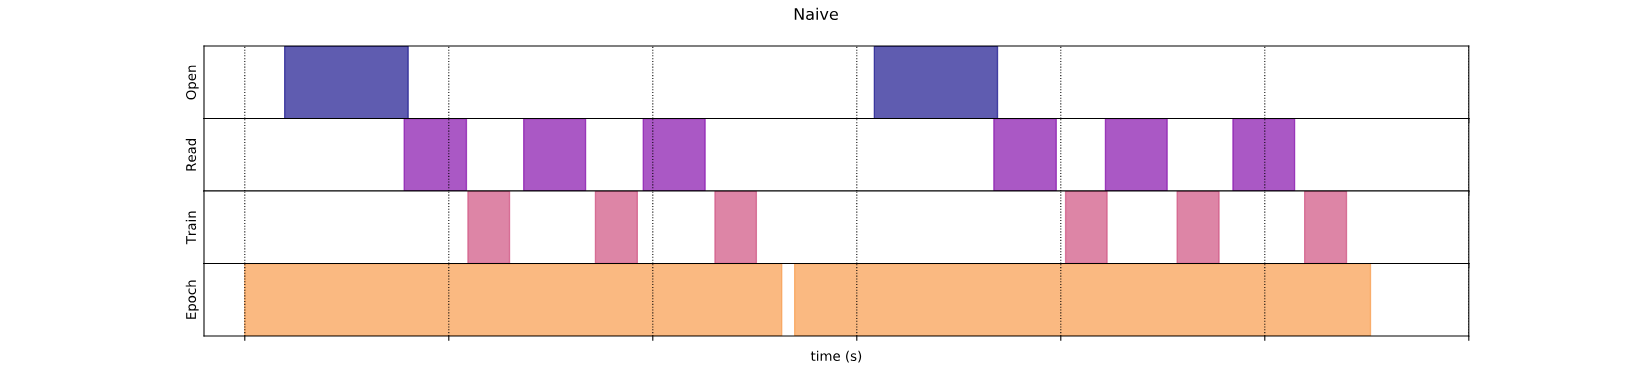
プリフェッチ：RaedとTrainを同時に行う
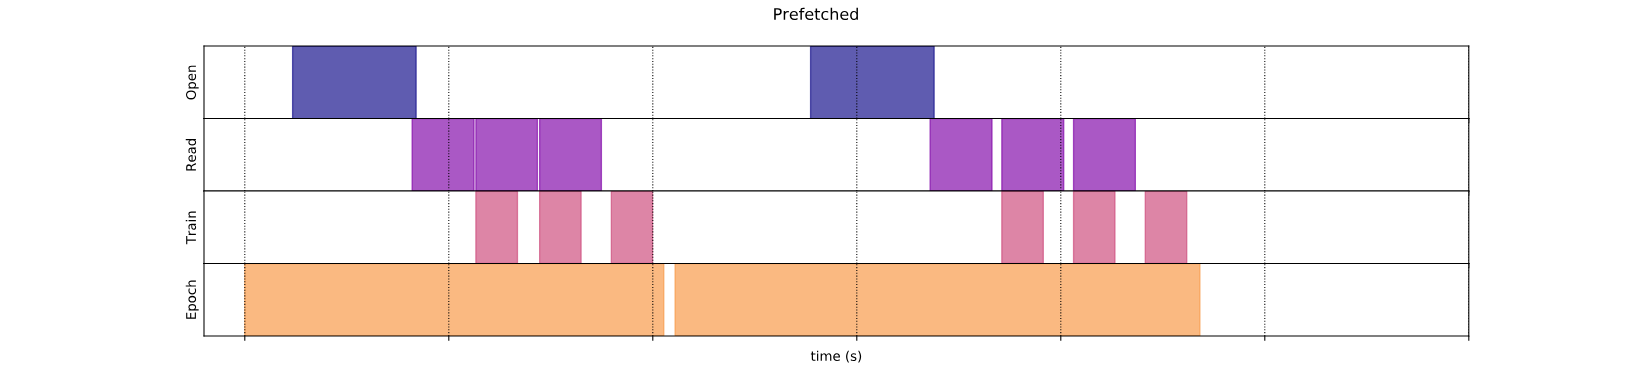
キャッシュ：一度にOpen
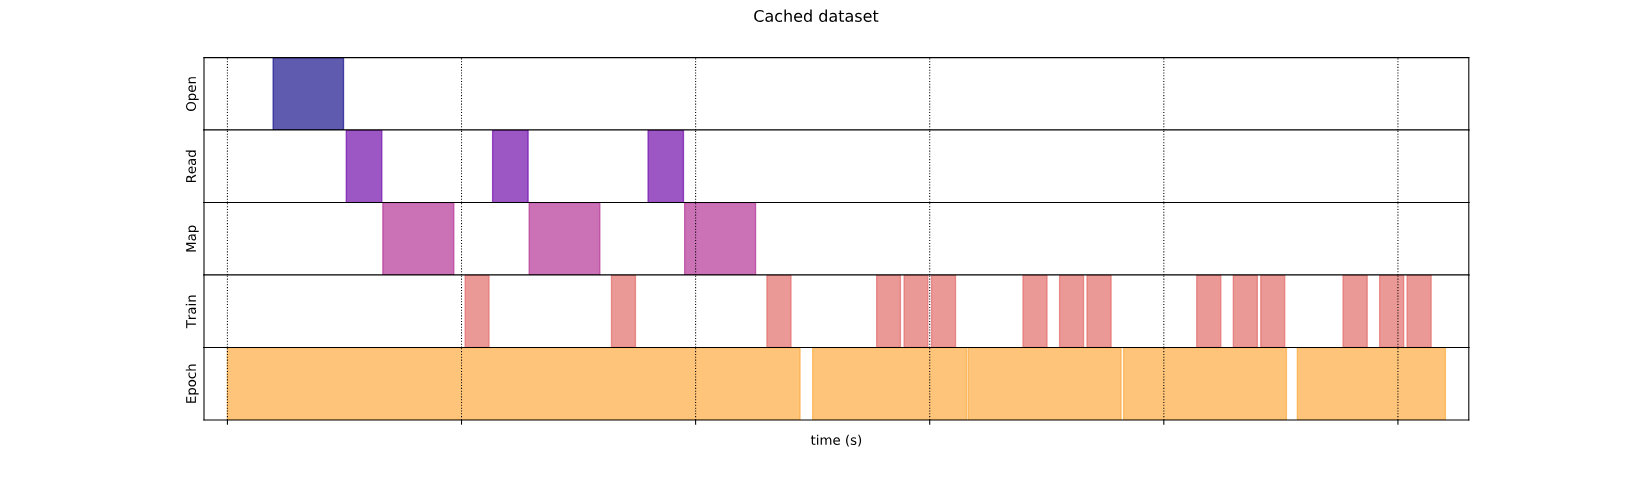


★https://www.tensorflow.org/guide/data_performance?hl=j  
**キャッシング**  
**tf.data.Dataset.cache 変換**は、メモリまたはローカルストレージのいずれかに、データセットをキャッシュすることができるため、各エポック中に一部の操作（ファイルを開いてデータを読み取るなど）が実行されなくなります。

★  
**プリフェッチ**  
プリフェッチは、トレーニングステップの事前処理とモデルの実行に重なって行われます。モデルがトレーニングステップ s を実行する間、入力パイプラインはステップ s+1 のデータを読み取っています。そうすることで、ステップ時間をトレーニングと、データの抽出にかかる時間の最大時間（和とは反対に）に減少させることができます。

tf.data API は、**tf.data.Dataset.prefetch 変換**を提供します。データが生成された時間をデータが消費された時間から切り離すために使用できます。具体的には、この変換は、バックグラウンドのスレッドと内部バッファを使用して、要求される前に入力データセットから要素をプリフェッチします。プリフェッチする要素の数は、単一のトレーニングステップによって消費されるバッチの数と同等（またはそれ以上）である必要があります。この値を手動で調整するか、tf.data.AUTOTUNE に設定することができますが、後者の場合、tf.data ランタイムによって、ランタイム時に動的に値が調整されます。

**プリフェッチ変換**は、「プロデューサ」の作業と「コンシューマ」の作業をオーバーラップする機会があればいつでもオーバーラップさせることに注意してください。

★  
prefetch  
CPUとGPU/TPUでそれぞれ並列に処理を実行させます。  
tf.experiments**.AUTOTUNEで自動的に調節されます。**  
pipeline.png
https://www.tensorflow.org/guide/data_performance

面倒なことは必要ありません。以下の処理を最後に加えるだけです。（本記事ではtrain_dataとtest_dataに対して行う）

dataset = dataset.prefetch(buffer_size=tf.data.experimental**.AUTOTUNE**)

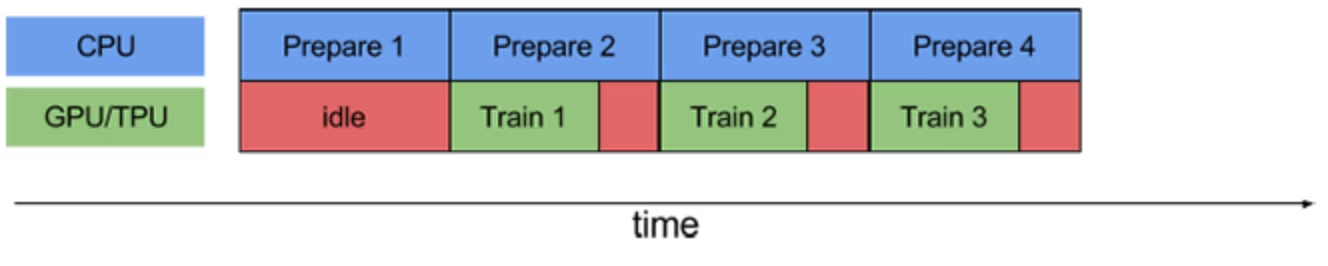

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# ★
AUTOTUNE

-1

新保先生アドバイスを追記：  
ー１自身には意味はない。デフォルトにする。AUTOTUNEという名前を付ける。


In [ ]:
print(train_ds)
print(val_ds)
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
# ★
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review [  54  457  103    2  119 2813   12   29   20   29    4   86 1992   15
 1132  457  189   34  349    6  618  801 5646    3   82   46   50  732
  266    3   75 4232    5    1    3    1 3949 2678 6400    7    2   61
    1    1   16 2244  441    1 2678    3    2  457 1472  129  175    3
  903   45    2  284   89  121 8520   64 2678  120    2  119  121   96
   29   95    6    2 2300 1549    3   45   37  114   68   71  163   29
 6805   31    3   28   78  150   45   71  227   26  493    6  730 6400
   22  349    6  618 3116   37   72  517   51   22 1927   56   44    5
   57  114   22 2259    2 1132  457    3  692   16    2 3914    5    2
 5987   48  120   12    1   78   92  383 4639   30    2   58   34  349
    6  730 5590  175    6   64  119  291    5    2  164    1  164    1
  328 1901  598   12   95    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0

### モデルを作成する

ニューラルネットワークを作成します。

In [ ]:
embedding_dim = 16

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

これらのレイヤーは、分類器を構成するため一列に積み重ねられます。

1. 最初のレイヤーは `Embedding` （埋め込み）レイヤーです。このレイヤーは、整数にエンコードされた語彙を受け取り、それぞれの単語インデックスに対応する埋め込みベクトルを検索します。埋め込みベクトルは、モデルのトレーニングの中で学習されます。ベクトル化のために、出力行列には次元が１つ追加されます。その結果、次元は、`(batch, sequence, embedding)` となります。埋め込みの詳細については、[単語埋め込みチュートリアル](https://www.tensorflow.org/text/guide/word_embeddings)を参照してください。
2. 次は、`GlobalAveragePooling1D`（１次元のグローバル平均プーリング）レイヤーです。このレイヤーは、それぞれのサンプルについて、シーケンスの次元方向に平均値をもとめ、固定長のベクトルを返します。この結果、モデルは最も単純な形で、可変長の入力を扱うことができるようになります。
3. この固定長の出力ベクトルは、16 個の非表示ユニットを持つ全結合 (`Dense`) レイヤーに受け渡されます。
4. 最後のレイヤーは、単一の出力ノードと密に接続されています。

★  
**単語の埋め込み**  
単語の埋め込みは、類似した単語が類似したエンコーディングを持つ効率的で密な表現を使用する方法を提供します。重要なのは、このエンコーディングを手動で指定する必要がないことです。埋め込みは、浮動小数点値の密なベクトルです（ベクトルの長さは指定したパラメーターです）。埋め込みの値を手動で指定する代わりに、それらはトレーニング可能なパラメーターです（モデルが密なレイヤーの重みを学習するのと同じ方法で、トレーニング中にモデルによって学習された重み）。大きなデータセットを操作する場合、8次元（小さなデータセットの場合）、最大1024次元の単語の埋め込みがよく見られます。高次元の埋め込みは、単語間のきめ細かい関係をキャプチャできますが、学習するにはより多くのデータが必要です。

新保先生アドバイスを追記：  
整数の場合、例：[1 2 3 4]、１と２は近く、１と４は遠い　のような意味となることもあり。  
これを少数、多次元にすることで近さと遠さの意味とする。  
1024次元・・・学習用に多くの次元とする。ただし、膨大な計算時間。  
計算時間を抑制するために、低い次元で実行（例：8次元）  


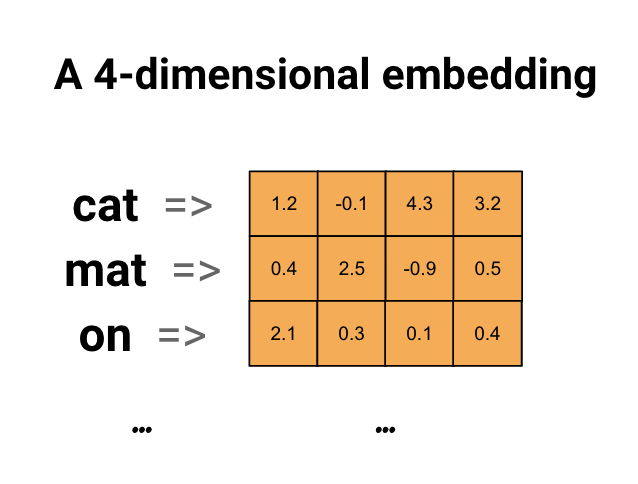

★  
上の図は単語の埋め込みの図です。各単語は、浮動小数点値の4次元ベクトルとして表されます。埋め込みを考える別の方法は、「ルックアップテーブル」です。これらの重みが学習された後、テーブルで対応する密なベクトルを検索することにより、各単語をエンコードできます。

格子  
格子は、データ内の任意の入出力関係を近似することができる**補間ルックアップテーブル**です。構造格子を入力空間にオーバーラップさせ、グリッドの頂点で出力の値を学習します。テストポイントがxの場合、f(x)はxを囲む格子の値から線形補間されます。

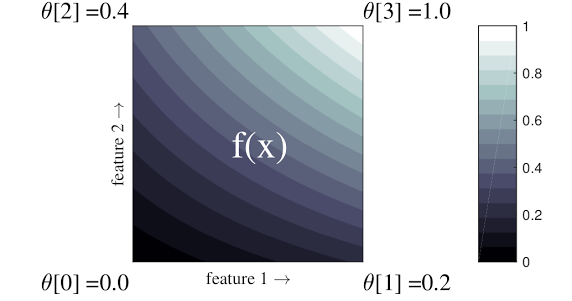

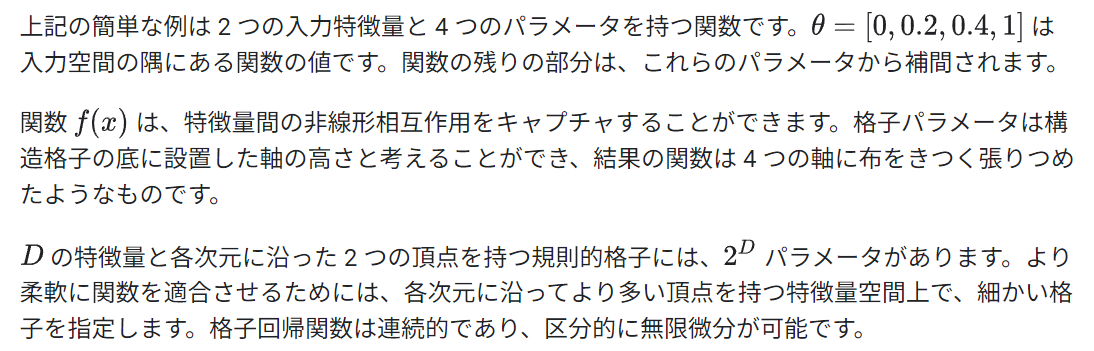

### 損失関数とオプティマイザ

モデルをトレーニングするには、損失関数とオプティマイザが必要です。これは二項分類問題であり、モデルは確率（シグモイドアクティベーションを持つ単一ユニットレイヤー）を出力するため、`losses.BinaryCrossentropy` 損失関数を使用します。

損失関数の候補はこれだけではありません。例えば、`mean_squared_error`（平均二乗誤差）を使うこともできます。しかし、一般的には、確率を扱うには`binary_crossentropy`の方が適しています。`binary_crossentropy`は、確率分布の間の「距離」を測定する尺度です。今回の場合には、真の分布と予測値の分布の間の距離ということになります。

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### モデルをトレーニングする

`dataset` オブジェクトを fit メソッドに渡すことにより、モデルをトレーニングします。

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 68s 100ms/step - loss: 0.6646 - binary_accuracy: 0.6901 - val_loss: 0.6148 - val_binary_accuracy: 0.7720
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5480 - binary_accuracy: 0.8001 - val_loss: 0.4976 - val_binary_accuracy: 0.8220
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4453 - binary_accuracy: 0.8445 - val_loss: 0.4200 - val_binary_accuracy: 0.8470
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3784 - binary_accuracy: 0.8655 - val_loss: 0.3737 - val_binary_accuracy: 0.8602
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3353 - binary_accuracy: 0.8788 - val_loss: 0.3452 - val_binary_accuracy: 0.8668
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3058 - binary_accuracy: 0.8874 - val_loss: 0.3261 - val_binary_accuracy: 0.8724
Epoch 7/10
625/625 [==============================] - 3s 4ms/

### モデルを評価する

モデルがどのように実行するか見てみましょう。2 つの値が返されます。損失（誤差、値が低いほど良）と正確度です。

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.3100 - binary_accuracy: 0.8741
Loss:  0.3100225627422333
Accuracy:  0.8741199970245361


この、かなり素朴なアプローチでも 86% 前後の正解度を達成しました。

### 経時的な正解度と損失のグラフを作成する

`model.fit()` は、トレーニング中に発生したすべての情報を詰まったディクショナリを含む `History` オブジェクトを返します。

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

トレーニングと検証中に監視されている各メトリックに対して 1 つずつ、計 4 つのエントリがあります。このエントリを使用して、トレーニングと検証の損失とトレーニングと検証の正解度を比較したグラフを作成することができます。

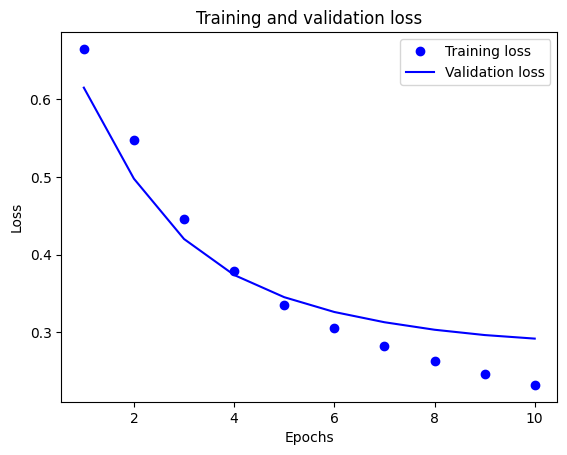

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

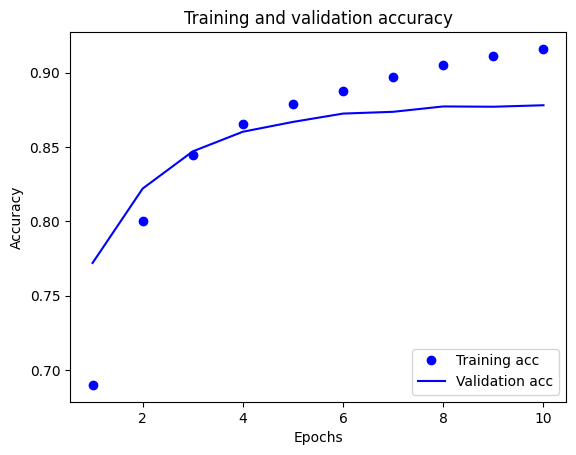

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

このグラフでは、点はトレーニングの損失と正解度を表し、実線は検証の損失と正解度を表します。

トレーニングの損失がエポックごとに*下降*し、トレーニングの正解度がエポックごとに*上昇*していることに注目してください。これは、勾配下降最適化を使用しているときに見られる現象で、イテレーションごとに希望する量を最小化します。

これは検証の損失と精度には当てはまりません。これらはトレーニング精度の前にピークに達しているようです。これが過適合の例で、モデルが、遭遇したことのないデータよりもトレーニングデータで優れたパフォーマンスを発揮する現象です。この後、モデルは過度に最適化し、テストデータに*一般化*しないトレーニングデータ*特有*の表現を学習します。

この特定のケースでは、検証の正解度が向上しなくなったときにトレーニングを停止することにより、過適合を防ぐことができます。これを行うには、`tf.keras.callbacks.EarlyStopping` コールバックを使用することができます。

★https://qiita.com/yukiB/items/f45f0f71bc9739830002  
**EarlyStopping**  
学習ループに収束判定を付与することができます．監視する値を設定し，それが収束したら自動的にループを抜ける処理になります．

keras.callbacks**.EarlyStopping**(monitor='val_loss', patience=0, verbose=0, mode='auto')  

**arguments**	description  
**monitor**	監視値指定．例えば，monitor='val_loss'  
**patience**	ループの最低数  
**verbose**	保存時に標準出力にコメントを出すか指定．{0, 1}  
**mode**	上限，下限どちらの側に収束した場合に収束判定を出すかの規定．{auto, min, max}  
上記の設定で，以下のように学習ループ途中であっても収束判定がかかり，ループから抜けることができます(下記の表示はverbose=1に設定していた場合)．

## モデルをエクスポートする

上記のコードでは、モデルにテキストをフィードする前に、`TextVectorization` レイヤーをデータセットに適用しました。モデルで生の文字列を処理できるようにする場合 (たとえば、展開を簡素化するため)、モデル内に `TextVectorization` レイヤーを含めることができます。これを行うには、トレーニングしたばかりの重みを使用して新しいモデルを作成します。

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 5s 6ms/step - loss: 0.3100 - accuracy: 0.8741
0.8741199970245361


### 新しいデータの推論

新しい例の予測を取得するには、`model.predict()`を呼び出します。

In [ ]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

1/1 [==============================] - 0s 121ms/step


array([[0.6414361 ],
       [0.46666566],
       [0.38394597]], dtype=float32)

モデル内にテキスト前処理ロジックを含めると、モデルを本番環境にエクスポートして展開を簡素化し、[トレーニング/テストスキュー](https://developers.google.com/machine-learning/guides/rules-of-ml#training-serving_skew)の可能性を減らすことができます。

TextVectorization レイヤーを適用する場所を選択する際に性能の違いに留意する必要があります。モデルの外部で使用すると、GPU でトレーニングするときに非同期 CPU 処理とデータのバッファリングを行うことができます。したがって、GPU でモデルをトレーニングしている場合は、モデルの開発中に最高のパフォーマンスを得るためにこのオプションを使用し、デプロイの準備ができたらモデル内に TextVectorization レイヤーを含めるように切り替えることをお勧めします。

モデルの保存の詳細については、この[チュートリアル](https://www.tensorflow.org/tutorials/keras/save_and_load)にアクセスしてください。

## 演習：StackOverflow の質問に対するマルチクラス分類

このチュートリアルでは、IMDB データセットで二項分類器を最初からトレーニングする方法を示しました。演習として、このノートブックを変更して、[Stack Overflow](http://stackoverflow.com/) のプログラミング質問のタグを予測するマルチクラス分類器をトレーニングできます。

Stack Overflow に投稿された数千のプログラミングに関する質問（たとえば、「Python でディクショナリを値で並べ替える方法」）の本文を含む[データセット](https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz)が用意されています。それぞれ、1 つのタグ（Python、CSharp、JavaScript、または Java のいずれか）でラベル付けされています。この演習では、質問を入力として受け取り、適切なタグ（この場合は Python）を予測します。

使用するデータセットには、1,700 万件以上の投稿を含む [BigQuery](https://console.cloud.google.com/marketplace/details/stack-exchange/stack-overflow) の大規模な StackOverflow パブリックデータセットから抽出された数千の質問が含まれています。

データセットをダウンロードすると、以前に使用した IMDB データセットと同様のディレクトリ構造になっていることがわかります。

```
train/
...python/
......0.txt
......1.txt
...javascript/
......0.txt
......1.txt
...csharp/
......0.txt
......1.txt
...java/
......0.txt
......1.txt
```

注意: 分類問題の難易度を上げるために、プログラミングの質問での Python、CSharp、JavaScript、または Java という単語は、*blank* という単語に置き換えられました（多くの質問には、対象の言語が含まれているため）。

この演習を完了するには、、このノートブックを変更してStackOverflow データセットを操作する必要があります。次の変更を行います。

1. ノートブックの上部で、IMDB データセットをダウンロードするコードを、事前に準備されている [Stack Overflow データセット](https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz)をダウンロードするコードで更新します。Stack Overflow データセットは同様のディレクトリ構造を持っているため、多くの変更を加える必要はありません。

2. 4 つの出力クラスがあるため、モデルの最後のレイヤーを `Dense(4)` に変更します。

3. モデルをコンパイルするときは、損失を  `tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` に変更します。これは、各クラスのラベルが整数である場合に、マルチクラス分類問題に使用する正しい損失関数です。(この場合、 0、*1*、*2*、または <em>3</em> のいずれかになります)。さらに、これはマルチクラス分類の問題であるため、メトリックを `metrics=['accuracy']` に変更します (<code>tf.metrics.BinaryAccuracy</code> はバイナリ分類器にのみ使用されます)。

4. 経時的な精度をプロットする場合は、`binary_accuracy` および `val_binary_accuracy`をそれぞれ `accuracy` および `val_accuracy` に変更します。

5. これらの変更が完了すると、マルチクラス分類器をトレーニングできるようになります。

## 詳細

このチュートリアルでは、最初からテキスト分類を実行する方法を紹介しました。一般的なテキスト分類ワークフローの詳細については、Google Developers の[テキスト分類ガイド](https://developers.google.com/machine-learning/guides/text-classification/)をご覧ください。
